In [51]:
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt

Convention used 

$\ket{0} = \begin{pmatrix} 1 \\ 0 \\ \end{pmatrix}$

$\ket{1} = \begin{pmatrix} 0 \\ 1 \\ \end{pmatrix}$

$\ket{+} = \frac{1}{\sqrt{2}}(\ket{0}+\ket{1} )$

$\ket{-} = \frac{1}{\sqrt{2}}(\ket{0} - \ket{1}  )$

For the resolution of the excercises it's needed to consider the Pauli matrices 
\begin{align*}
	\hat{X} &= \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} \qquad&
	\hat{Y} &= \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix} \qquad &
	\hat{Z} &= \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}
\end{align*}

In [2]:
X = smp.Matrix([[0,1],[1,0]]) # Matriz de Pauli en x
Y = smp.Matrix([[0,-smp.I],[smp.I,0]]) # Matriz de Pauli en y
Z = smp.Matrix([[1,0],[0,-1]]) # Matriz de Pauli en z

In [33]:
# Definition of very state

def ket(simbolo):
	return smp.Symbol(r"\left|" + f"{simbolo}" + r"\right \rangle")

# |0>
########################
ket0 = smp.Matrix([1,0])
ketD0 = ket(0)

# |1>
########################
ket1 = smp.Matrix([0,1])
ketD1 = ket(1)

# |+>
#######################
ket_mas = (1/smp.sqrt(2))*(ket0+ket1)

# |->
#######################
ket_men = (1/smp.sqrt(2))*(ket0-ket1)

# |+i>
#######################
ket_imas = (1/smp.sqrt(2))*(ket0+smp.I*ket1)

# |-i>
#######################
ket_imen = (1/smp.sqrt(2))*(ket0-smp.I*ket1)

def get_ket_weight(vector, base):
    # Generar coeficientes simbólicos
    coefficient = list(smp.symbols(f"c_0:{len(base)}"))
    
    # Crear la expresión de la combinación lineal de los kets
    ket_expression = smp.Matrix([0,0])
    for i in range(len(vector)):
        ket_expression += coefficient[i]*base[i]
    
    # Crear la ecuación que iguala la combinación lineal a nuestro vector columna
    eq = smp.Eq(ket_expression, vector)
    
    # Resolver el sistema de ecuaciones
    return smp.solve(eq, tuple(coefficient)) , coefficient


# Exercise 1

## 1)  Open this link to Craig Gidney's Quirk to see what happens qhen a qubit initially in the state $\ket{+} = \frac{1}{\sqrt{2}}(\ket{0}+\ket{1} )$ (spin pointing in the $+X$ direction) rotates around the $Z$ axis. Open this link to see what happens if we increase the frequency $\omega$ by 10 times.

https://algassert.com/quirk#circuit={%22cols%22:[[%22H%22],[{%22id%22:%22Rzft%22,%22arg%22:%22pi%20t%22}]]}

https://algassert.com/quirk#circuit={%22cols%22:[[%22H%22],[{%22id%22:%22Rzft%22,%22arg%22:%2210*pi%20t%22}]]}

## 2) Write down the final state $\ket{\psi}_f$ if the initial state $\ket{\psi}_0 = \ket{+} =\frac{1}{\sqrt{2}}(\ket{0}+\ket{1})$ is rotated by the following operators, build the the corresponding quantum cirtuit on Quirk and locate the final state on the Bloch sphere.

In [49]:
omega, theta,phi, t = smp.symbols(r"\omega , \theta , \phi , t", real = True) # Symbols to use in the operator

a, b = smp.symbols(r"a,b") # Symbols to descompose the column vector in bra-ket notation

R = (smp.cos(omega*t/2)*smp.Matrix([[1,0],[0,1]]) - smp.I*smp.sin(omega*t/2)*Z).applyfunc(lambda expr: expr.rewrite(smp.exp))

ket_result = (R*ket_mas).applyfunc(lambda expr: expr.rewrite(smp.exp)) # Changing trig function to exponential functions

sol,key = get_ket_weight(ket_result, [ket0,ket1])

ketD_result = (sol[key[0]]*ketD0 + sol[key[1]]*ketD1).factor() # vector in ket basis

print("Original State")
display(ket_mas)
print("Rotation operator")
display(R)
print("Resultant State")
display(ket_result)
display(ketD_result)

Original State


Matrix([
[sqrt(2)/2],
[sqrt(2)/2]])

Rotation operator


Matrix([
[exp(-I*\omega*t/2),                 0],
[                 0, exp(I*\omega*t/2)]])

Resultant State


Matrix([
[sqrt(2)*exp(-I*\omega*t/2)/2],
[ sqrt(2)*exp(I*\omega*t/2)/2]])

sqrt(2)*(\left|0\right \rangle + \left|1\right \rangle*exp(I*\omega*t))*exp(-I*\omega*t/2)/2

a) $R_{\hat{Z}}(\frac{\pi}{4}) = e^{-\frac{i \pi}{8}}$

In [63]:
ketf = ket(r"\psi")
smp.Eq(ketf,ketD_result.subs([(omega*t,smp.pi/4)]))

Eq(\left|\psi\right \rangle, sqrt(2)*(\left|0\right \rangle + \left|1\right \rangle*exp(I*pi/4))*exp(-I*pi/8)/2)

b) $R_{\hat{Z}}(\frac{\pi}{2}) = e^{-\frac{i \pi}{4}}$

In [ ]:
smp.Eq(ketf,ketD_result.subs([(omega*t,smp.pi/2)]))

Eq(\left|\psi\right \rangle, sqrt(2)*(\left|0\right \rangle + I*\left|1\right \rangle)*exp(-I*pi/4)/2)

c) $R_{\hat{Z}}(\pi) = e^{-\frac{i \pi}{2}}$

In [65]:
smp.Eq(ketf,ketD_result.subs([(omega*t,smp.pi)]))

Eq(\left|\psi\right \rangle, -sqrt(2)*I*(\left|0\right \rangle - \left|1\right \rangle)/2)

d) $R_{\hat{Z}}(2 \pi) = e^{-i \pi}$

In [66]:
smp.Eq(ketf,ketD_result.subs([(omega*t,smp.pi*2)]))

Eq(\left|\psi\right \rangle, -sqrt(2)*(\left|0\right \rangle + \left|1\right \rangle)/2)

Open this link to Craig Gidney's Quirk to see what happens when a qubit initially in the state $\ket{0}$ (spin pointing in the $+Z$ direction) rotates around the $X$ axis. Does the right-hand rule describe the behavior of the qubit?

# Exercise 2

## 1) If the qubit is in the state $\ket{+}$ and we perform a quantum measurement in the $Z$ basis (that is, we measure the projection of the qubit's spin along the $Z$ direction as in a Stern-Gerlach experiment), calculate the probablilities of collapsing the state to $\ket{0}$ and to $\ket{1}$. Visualize this on Quirk.

In [44]:
# Collapsing in state |0>

M0 = ket0*ket0.H

p0 = ((ket_mas.H *M0.H)*(M0*ket_mas))[0]

M1 = ket1*ket1.H
p1 = ((ket_mas.H *M1.H)*(M1*ket_mas))[0]

print("Collapsing in state |0>")
print("Operator M_0")
display(M0)
print("Probability")
display(p0)

print("Collapsing in state |1>")
print("Operator M_1")
display(M1)
print("Probability")
display(p1)

Collapsing in state |0>
Operator M_0


Matrix([
[1, 0],
[0, 0]])

Probability


1/2

Collapsing in state |1>
Operator M_1


Matrix([
[0, 0],
[0, 1]])

Probability


1/2

## 2) The qubit starts in state $\ket{0}$ and the magnetic field in the $+X$ direction generates a precession about the $X$ axis. The unitary time evolution is given by $e^{-\frac{i \omega t}{2} \hat{X}} = cos(\frac{\omega t}{2}) I - i sin (\frac{\omega t}{2}) \hat{X}$ . If we perform  a measurement in the $Z$ basis, calculete the probability of obtaining the $\ket{0}$ at time $t$ . Visualize this on Quirk

Resultant state


Matrix([
[cos(\omega*t/2)],
[sin(\omega*t/2)]])

Probability of getting |0>


sin(\omega*t/2)**2

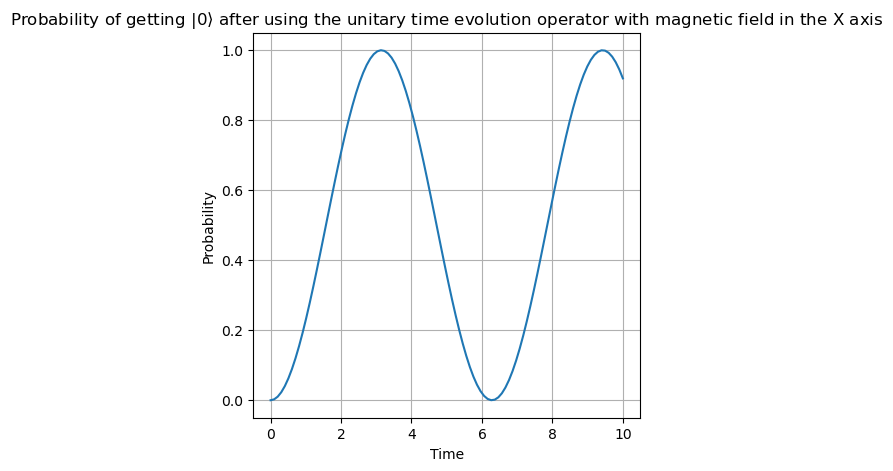

In [64]:
U = smp.cos(smp.Rational(-1,2)*omega*t)*smp.Matrix([[1,0],[0,1]]) - smp.sin(smp.Rational(-1,2)*omega*t)*X
ket_result = U*ket0

proba = ((ket_result.H *M1.H)*(M1*ket_result))[0]

print("Resultant state")
display(ket_result)
print("Probability of getting |0>")
display(proba)

proba_n = smp.lambdify((omega,t),proba)
omega_n = 1
t_n = np.linspace(0,10,100)

fig, ax = plt.subplots(1,1, figsize = (5,5))

ax.plot(t_n, proba_n(omega_n,t_n))

ax.set_title(r"Probability of getting $|0\rangle$ after using the unitary time evolution operator with magnetic field in the X axis")
ax.set_xlabel("Time")
ax.set_ylabel("Probability")
ax.grid()

# Exercise 3

## 1) To express a density matrix in matrix notation, a basis has to be chosen. We typically use the $\{ \ket{0}, \ket{1} \} $ (Z) basis. Write down the density matrix for classical mixture of $50\%$ $\ket{0}$ and $50\%$ $\ket{1}$ in matrix form in the $Z$ basis.

In [67]:
rho_050_150 = smp.Rational(1,2)*(ket0*ket0.H + ket1*ket1.H)

print("Density Matrix for 50% |0> and 50% |1>")
display(rho_050_150)

Density Matrix for 50% |0> and 50% |1>


Matrix([
[1/2,   0],
[  0, 1/2]])

## 2) Write down the density matrix for the pure state $\ket{+}$ in the $Z$ basis. How is it different form the previous state?

In [68]:
rho_mas = ket_mas*ket_mas.H

print("Density Matrix for |+>")
display(rho_mas)

Density Matrix for |+>


Matrix([
[1/2, 1/2],
[1/2, 1/2]])

## 3) Write down the density matrix for the classical mixture of  $50\%$ $\ket{0}$ and $50\%$ $\ket{1}$ in matrix form in the $Z$ basis.

In [69]:
rho_cla_mixture = smp.Rational(1,2)*rho_mas + smp.Rational(1,2)*(ket_men*ket_men.H)

print("Density Matrix for the classic 50% |0> and 50% |1>")
display(rho_cla_mixture)

Density Matrix for the classic 50% |0> and 50% |1>


Matrix([
[1/2,   0],
[  0, 1/2]])

# Exercise 4

## 1) Find $n_x$ , $n_y$ , $n_z$ for the following pure states and verify what $n_{x}^2 + n_{y}^2 + n_{z}^2 = 1 $

As it is mencioned in the problem, the way to get to the solution is to find the trace of the matricial product between the Pauli matrices and the density matrix $\rho$ associated to the system, 
\begin{align}
n_x = Tr[\hat{X}\rho]  \\
n_y = Tr[\hat{Y}\rho]  \\
n_z = Tr[\hat{Z}\rho]  \\
\end{align}
Its also important to mention that the density matrix of a pure state $\psi$ is given by the next expression
\begin{align}
\rho = |\psi\rangle\langle\psi|
\end{align}

a) $\ket{0}$

In [5]:
rho_0 = ket0*ket0.H  

nx_0 = (X*rho_0).trace()

ny_0 = (Y*rho_0).trace()

nz_0 = (Z*rho_0).trace()

print("density matrix:")
display(rho_0)
display(f"nx = {nx_0}")
display(f"ny = {ny_0}")
display(f"nz = {nz_0}")
display (f"the sum of the square of this terms is {nx_0**2 + ny_0**2 +nz_0**2}")

density matrix:


Matrix([
[1, 0],
[0, 0]])

'nx = 0'

'ny = 0'

'nz = 1'

'the sum of the square of this terms is 1'

b) $\ket{1}$

In [ ]:
rho_1 = ket1*ket1.H

nx_1 = (X*rho_1).trace()

ny_1 = (Y*rho_1).trace()

nz_1 = (Z*rho_1).trace()

print("density matrix:")
display(rho_1)
display(f"nx = {nx_1}")
display(f"ny = {ny_1}")
display(f"nz = {nz_1}")
display (f"the sum of the square of this terms is {nx_1**2 + ny_1**2 +nz_1**2}")

density matrix:


Matrix([
[0, 0],
[0, 1]])

'nx = 0'

'ny = 0'

'nz = -1'

'the sum of the square of this terms is 1'

c) $\ket{+} = \frac{1}{\sqrt{2}}(\ket{0} + \ket{1})$

In [ ]:
rho_mas = ket_mas*ket_mas.H

nx_mas = (X*rho_mas).trace()

ny_mas = (Y*rho_mas).trace()

nz_mas = (Z*rho_mas).trace()

print("density matrix:")
display(rho_mas)
display(f"nx = {nx_mas}")
display(f"ny = {ny_mas}")
display(f"nz = {nz_mas}")
display (f"the sum of the square of this terms is {nx_mas**2 + ny_mas**2 +nz_mas**2}")

density matrix:


Matrix([
[1/2, 1/2],
[1/2, 1/2]])

'nx = 1'

'ny = 0'

'nz = 0'

'the sum of the square of this terms is 1'

d) $\ket{-} = \frac{1}{\sqrt{2}}(\ket{0} - \ket{1} )$

In [8]:
rho_men = ket_men*ket_men.H

nx_men = (X*rho_men).trace()

ny_men = (Y*rho_men).trace()

nz_men = (Z*rho_men).trace()

print("density matrix:")
display(rho_men)
display(f"nx = {nx_men}")
display(f"ny = {ny_men}")
display(f"nz = {nz_men}")
display (f"the sum of the square of this terms is {nx_men**2 + ny_men**2 +nz_men**2}")

density matrix:


Matrix([
[ 1/2, -1/2],
[-1/2,  1/2]])

'nx = -1'

'ny = 0'

'nz = 0'

'the sum of the square of this terms is 1'

e) $\ket{+i} = \frac{1}{\sqrt{2}} (\ket{0} + i\ket{1})$

In [ ]:
rho_imas = ket_imas*ket_imas.H

nx_imas = (X*rho_imas).trace()

ny_imas = (Y*rho_imas).trace()

nz_imas = (Z*rho_imas).trace()

print("density matrix:")
display(rho_imas)
display(f"nx = {nx_imas}")
display(f"ny = {ny_imas}")
display(f"nz = {nz_imas}")
display (f"the sum of the square of this terms is {nx_imas**2 + ny_imas**2 +nz_imas**2}")

density matrix:


Matrix([
[1/2, -I/2],
[I/2,  1/2]])

'nx = 0'

'ny = 1'

'nz = 0'

'the sum of the square of this terms is 1'

d) $\ket{-i}= \frac{1}{\sqrt{2}} (\ket{0} - i\ket{1})$

In [10]:
rho_imen = ket_imen*ket_imen.H

nx_imen = (X*rho_imen).trace()

ny_imen = (Y*rho_imen).trace()

nz_imen = (Z*rho_imen).trace()

print("density matrix:")
display(rho_imen)
display(f"nx = {nx_imen}")
display(f"ny = {ny_imen}")
display(f"nz = {nz_imen}")
display (f"the sum of the square of this terms is {nx_imen**2 + ny_imen**2 +nz_imen**2}")

density matrix:


Matrix([
[ 1/2, I/2],
[-I/2, 1/2]])

'nx = 0'

'ny = -1'

'nz = 0'

'the sum of the square of this terms is 1'

## 2) Find $n_x$ , $n_y$ , $n_z$ for the following mixed states

In the case of a mixed state $|\psi\rangle$ the density matrix cannot be described like in a pure state. In a mixed state the correct expression for the density matrix $\rho$ is a classical mixture of the possible quanctum states.
\begin{equation}
\rho = \sum_{i} p_{i}|\psi\rangle_{i}\langle\psi|_{i}
\end{equation}
Where $p_{i}$ is the probability of finding such state in the classical mixture. The form of finding $n_{x}, n_{y}$ and $n_{z}$ is the same as in a pure state

a) 50%  $\ket{0}$ and 50% $\ket{1}$

In [11]:
rho_01_half = smp.Rational(1,2)*(ket0*ket0.H + ket1*ket1.H)

nx_01_half = (X*rho_01_half).trace()

ny_01_half = (Y*rho_01_half).trace()

nz_01_half = (Z*rho_01_half).trace()

print("density matrix:")
display(rho_01_half)
display(f"nx = {nx_01_half}")
display(f"ny = {ny_01_half}")
display(f"nz = {nz_01_half}")

density matrix:


Matrix([
[1/2,   0],
[  0, 1/2]])

'nx = 0'

'ny = 0'

'nz = 0'

b) 50% $\ket{+}$ and 50% $\ket{-}$

In [17]:
rho_mas_men_half = smp.Rational(1,2)*(ket_mas*ket_mas.H + ket_men*ket_men.H)

nx_mas_men_half = (X*rho_mas_men_half).trace()

ny_mas_men_half = (Y*rho_mas_men_half).trace()

nz_mas_men_half = (Z*rho_mas_men_half).trace()

print("density matrix:")
display(rho_mas_men_half)
display(f"nx = {nx_mas_men_half}")
display(f"ny = {ny_mas_men_half}")
display(f"nz = {nz_mas_men_half}")

density matrix:


Matrix([
[1/2,   0],
[  0, 1/2]])

'nx = 0'

'ny = 0'

'nz = 0'

c) 70%  $\ket{0}$ and 30% $\ket{1}$

In [20]:
rho_01_mix = smp.Rational(7,10)*(ket0*ket0.H) + smp.Rational(3,10)*(ket1*ket1.H)

nx_01_mix = (X*rho_01_mix).trace()

ny_01_mix = (Y*rho_01_mix).trace()

nz_01_mix = (Z*rho_01_mix).trace()

print("density matrix:")
display(rho_01_mix)
display(f"nx = {nx_01_mix}")
display(f"ny = {ny_01_mix}")
display(f"nz = {nz_01_mix}")

density matrix:


Matrix([
[7/10,    0],
[   0, 3/10]])

'nx = 0'

'ny = 0'

'nz = 2/5'

d) 70%  $\ket{+}$ and 30% $\ket{-}$

In [21]:
rho_mas_men_mix = smp.Rational(7,10)*(ket_mas*ket_mas.H) + smp.Rational(3,10)*(ket_men*ket_men.H)

nx_mas_men_mix = (X*rho_mas_men_mix).trace()

ny_mas_men_mix = (Y*rho_mas_men_mix).trace()

nz_mas_men_mix = (Z*rho_mas_men_mix).trace()

print("density matrix:")
display(rho_mas_men_mix)
display(f"nx = {nx_mas_men_mix}")
display(f"ny = {ny_mas_men_mix}")
display(f"nz = {nz_mas_men_mix}")

density matrix:


Matrix([
[1/2, 1/5],
[1/5, 1/2]])

'nx = 2/5'

'ny = 0'

'nz = 0'

e) 20% $\ket{+i}$ and 80% $\ket{-i}$

In [22]:
rho_i_half = smp.Rational(1,5)*(ket_imas*ket_imas.H)+smp.Rational(4,5)*(ket_imen*ket_imen.H)

nx_i_half = (X*rho_i_half).trace()

ny_i_half = (Y*rho_i_half).trace()

nz_i_half = (Z*rho_i_half).trace()

print("density matrix:")
display(rho_i_half)
display(f"nx = {nx_i_half}")
display(f"ny = {ny_i_half}")
display(f"nz = {nz_i_half}")

density matrix:


Matrix([
[    1/2, 3*I/10],
[-3*I/10,    1/2]])

'nx = 0'

'ny = -3/5'

'nz = 0'

## 3) A little stat-mech digression: a thermal state for 1 qubit can be expressed as $p_0 \ket{0}\bra{0} + p_1 \ket{1}\bra{1}$, where $p_0 = \frac{1}{Z}$ , $p_1 = e^{-E \beta}$ , $\beta = \frac{1}{k_B T}$, and $Z = 1 + e^{-E \beta}$ . Find the Bloch sphere Catesian coordinates of thermal states with the following temperatures:

In [132]:
E = smp.symbols(r"E", negative = True) # Define E as real generates problems when T aproches to 0, but if E is negative it works fine
T,kb = smp.symbols(r" T,k_B", positive = True)

Z_partition = 1 + smp.exp(-E/(T*kb))
p0 = 1/Z_partition
p1 = smp.exp(-E/(T*kb))

print("Z_partition Function")
display(Z_partition)

display(p0)

display(p1)

Z_partition Function


1 + exp(-E/(T*k_B))

1/(1 + exp(-E/(T*k_B)))

exp(-E/(T*k_B))

a) $T  = 0$

In [120]:
smp.limit(p0,T,0)

0

In [121]:
smp.limit(p1,T,0)

oo

In [133]:
rho_T0 = smp.limit(p0,T,0)*ket0*ket0.H + smp.limit(p1,T,0)*ket1*ket1.H



nx = (X*rho_T0).trace()


ny = (Y*rho_T0).trace()

nz = (Z*rho_T0).trace()

print("Density function")
display(rho_T0)

print("Cartitian Coordinates in the Bloch Sphere")

print("x")
display(nx)

print("y")
display(ny)

print("z")
display(nz)

Density function


Matrix([
[  0,  0],
[nan, oo]])

Cartitian Coordinates in the Bloch Sphere
x


nan

y


nan

z


nan

b) $T \rightarrow \infty$

In [134]:
rho_Too = smp.limit(p0,T,smp.oo)*ket0*ket0.H + smp.limit(p1,T,smp.oo)*ket1*ket1.H



nx = (X*rho_Too).trace()


ny = (Y*rho_Too).trace()

nz = (Z*rho_Too).trace()

print("Density function")
display(rho_Too)

print("Cartitian Coordinates in the Bloch Sphere")

print("x")
display(nx)

print("y")
display(ny)

print("z")
display(nz)

Density function


Matrix([
[1/2, 0],
[  0, 1]])

Cartitian Coordinates in the Bloch Sphere
x


0

y


0

z


-1/2

c) Any temperature between $0$ and $\infty$

In [135]:
rho_T = p0*ket0*ket0.H + p1*ket1*ket1.H



nx = (X*rho_T).trace()


ny = (Y*rho_T).trace()

nz = (Z*rho_T).trace()

print("Density function")
display(rho_T)

print("Cartitian Coordinates in the Bloch Sphere")

print("x")
display(nx)

print("y")
display(ny)

print("z")
display(nz)

Density function


Matrix([
[1/(1 + exp(-E/(T*k_B))),               0],
[                      0, exp(-E/(T*k_B))]])

Cartitian Coordinates in the Bloch Sphere
x


0

y


0

z


-exp(-E/(T*k_B)) + 1/(1 + exp(-E/(T*k_B)))

## 4) Start with a pure state of the form $\ket{\psi} = cos(\frac{\theta}{2})\ket{0} + e^{i \phi} sin(\frac{\theta}{2}) \ket{1}$, find $n_x$ , $n_y$ , $n_z$, abd prove that $n_{x}^2 + n_{y}^2 + n_{z}^2 = 1$